In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs, make_circles
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import combinations

%matplotlib inline

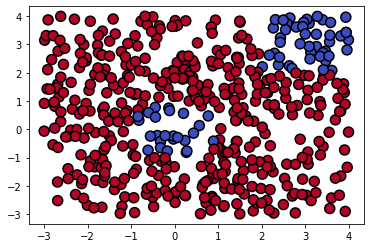

In [14]:
RANDOM_SEED = 139

def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

N = 500
train_data = 7 * np.random.random_sample((N,2)) - np.array([3,3])

train_labels = get_labels(train_data)

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

shallow_rf = RandomForestClassifier(n_estimators=5, max_depth=3, n_jobs=-1, 
                                    random_state=RANDOM_SEED)
deep_rf = RandomForestClassifier(n_estimators=5, max_depth=6, n_jobs=-1, 
                                 random_state=RANDOM_SEED)

# training the tree
shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)

plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

<ipython-input-15-9fd3e2ad3627>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
<ipython-input-15-9fd3e2ad3627>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')


Text(0.5, 1.0, 'Deep Random Forest')

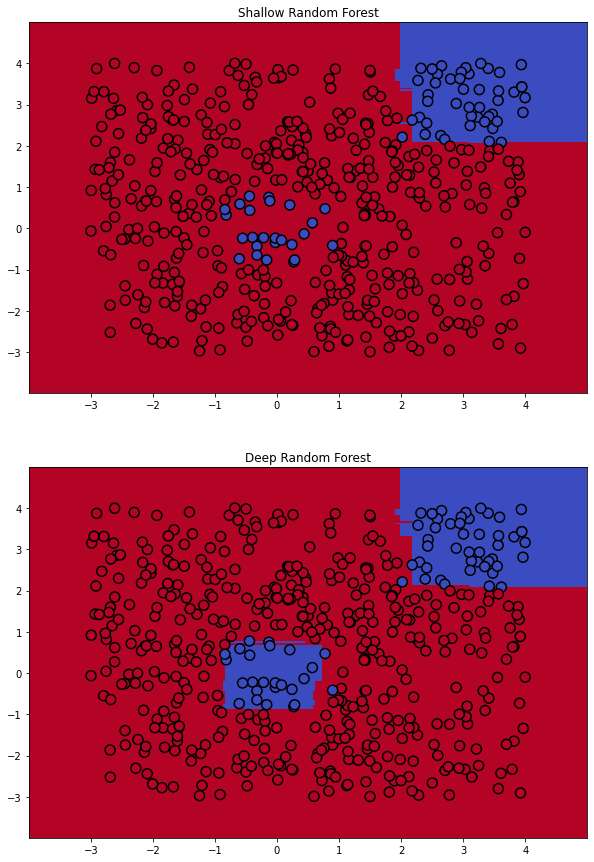

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(10,15))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap='coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap='coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);
ax[1].set_title('Deep Random Forest')

In [2]:
df = pd.read_csv('spam7.csv')

In [3]:
df.rename({'yesno':'spam'}, axis=1, inplace=True)

In [4]:
df.spam=df.spam.apply(lambda x: 1 if x=='y' else 0)

In [5]:
df.head()

Unnamed: 0  crl.tot  dollar   bang  money  n000  make  spam
0           1      278   0.000  0.778   0.00  0.00  0.00     1
1           2     1028   0.180  0.372   0.43  0.43  0.21     1
2           3     2259   0.184  0.276   0.06  1.16  0.06     1
3           4      191   0.000  0.137   0.00  0.00  0.00     1
4           5      191   0.000  0.135   0.00  0.00  0.00     1

In [6]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [7]:
col=df.columns
lcol=len(col)-1
for i in range(0,lcol):
    for l in range(i+1,lcol):
        name_col=col[i]+'_'+col[l]
        df[name_col]=df.iloc[:,i]*df.iloc[:,l]
        

In [8]:
X=df.drop(['spam'],axis=1).to_numpy()
Y=df['spam'].to_numpy()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=42)
model=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features=None)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(f'accuary = {accuracy_score(y_test,y_pred)}')

accuary = 0.8653637350705755


In [10]:
# model is the trained model 
importances = model.feature_importances_  
# train_features is the dataframe of training features 
feature_list = list(df.columns)
feature_list.remove('spam')
# Extract the feature importances into a dataframe 
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})  
# Show the top 10 most important 
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)  
feature_results

feature  importance
0     crl.tot_bang    0.614471
1           dollar    0.140972
2      dollar_bang    0.060644
3             bang    0.042867
4    crl.tot_money    0.040098
5          crl.tot    0.029846
6             n000    0.024999
7   crl.tot_dollar    0.008056
8     dollar_money    0.007222
9     crl.tot_make    0.007187
10      bang_money    0.006508
11           money    0.006139
12     dollar_n000    0.003102
13       bang_make    0.001902
14     dollar_make    0.001721
15    crl.tot_n000    0.001377
16       bang_n000    0.001176
17            make    0.001052
18       n000_make    0.000661
19      money_n000    0.000000
20      money_make    0.000000

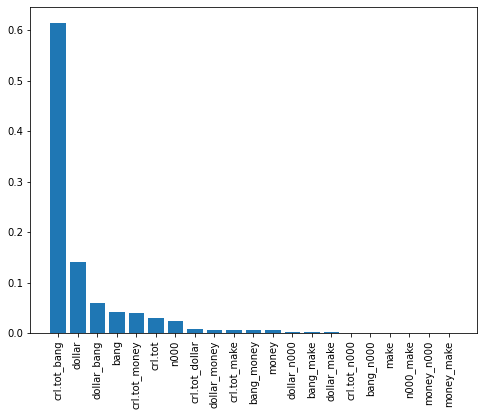

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(feature_results['feature'],feature_results['importance'])
plt.tick_params(axis='x', labelrotation=90)


In [14]:
gr_search = GridSearchCV(model,
                        param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
                                      'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]},
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=5)
gr_search.fit(x_train, y_train)
print(gr_search.best_params_, gr_search.best_score_)

{'learning_rate': 0.01, 'n_estimators': 1500} 0.8836956521739131


In [20]:
# 6.4.3

gbc=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500, 
                               max_depth=3, random_state=42)
gbc.fit(x_train,y_train)
depth_par=GridSearchCV(gbc,
                      param_grid={'max_depth':[5,6,7,8,9,10,11,12,13,14,15]},
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5)
depth_par.fit(x_train,y_train)
print(depth_par.best_params_, depth_par.best_score_)

{'max_depth': 5} 0.8855978260869565


In [36]:
# 6.4.4

def AdaBoost_scratch(X,y, M=10, learning_rate = 1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [],[],[],[]

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth = 1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)
        
        # Оцениваем ошибку
        estimator_error = (sample_weight * incorrect).sum() / sample_weight.sum() 
        
        # Вычисляем вес нового алгоритма
        estimator_weight =  learning_rate * np.log ((1-estimator_error)/estimator_error)

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, Y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363


In [1]:
# 6.6.1
import pandas as pd
import numpy as np

from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,
                              RandomForestClassifier, ExtraTreesClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits

from tqdm import tqdm

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import randint

dataset = load_digits()
X, y = dataset['data'], dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
def compute_meta_feature_mean(clf, X_train, X_test, y_train, cv):
    """
    Эта функция подсчитывает признаки для мета-классификатора. 
    Они являются вероятностями классов при решении задачи многоклассовой классификации.

    :arg clf: классификатор
    :args X_train, y_train: обучающая выборка
    :arg X_test: признаки тестовой выборки
    :arg cv: класс, генерирующий фолды (KFold)

    :returns X_meta_train, X_meta_test: новые признаки для обучающей и тестовой выборок
    """
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(X_train), n_classes), dtype=np.float32)
    X_meta_test = np.zeros((len(X_test), n_classes), dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]

        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)

        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
        
        X_meta_test += folded_clf.predict_proba(X_test)
        
    X_meta_test /= cv.n_splits
    return X_meta_train, X_meta_test

In [2]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
   
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.hstack([
        features_train for features_train, features_test in features
    ])

    stacked_features_test = np.hstack([
        features_test for features_train, features_test in features
    ])
    
    return stacked_features_train, stacked_features_test


def compute_metric(clf, X_train=X_train, y_train=y_train, X_test=X_test):
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    return np.round(f1_score(y_test, y_test_pred, average='macro'), 6)

In [3]:
# 6.6.2
cv = KFold(n_splits=10, shuffle=True, random_state=42)

st_features_train, st_features_test = generate_meta_features([
  LogisticRegression(C=0.001, penalty='l1', solver='saga', max_iter=2000, multi_class='ovr', random_state=42),
  LogisticRegression(C=0.001, penalty='l2', solver='saga', max_iter=2000, multi_class='multinomial', random_state=42),
  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
  GradientBoostingClassifier(n_estimators=200, random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=LogisticRegression(penalty='none',multi_class='auto', solver='lbfgs', random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 4/4 [07:55<00:00, 118.81s/it]

f1_score = 0.969503


In [15]:
st_features_train, st_features_test = generate_meta_features([
  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42),
  ExtraTreesClassifier(n_estimators=200, n_jobs=-1,random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=LogisticRegression(penalty='none',multi_class='auto', solver='lbfgs', random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 2/2 [00:13<00:00,  6.67s/it]

f1_score = 0.982421


In [17]:
st_features_train, st_features_test = generate_meta_features([
  KNeighborsClassifier(),
  ExtraTreesClassifier(n_estimators=200, n_jobs=-1,random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=LogisticRegression(penalty='none',multi_class='auto', solver='lbfgs', random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 2/2 [00:05<00:00,  2.64s/it]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


f1_score = 0.989904


In [19]:
st_features_train, st_features_test = generate_meta_features([
  LogisticRegression(C=0.001, penalty='l1', solver='saga', max_iter=2000, multi_class='ovr', random_state=42),
  KNeighborsClassifier(),
  ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=42),
  AdaBoostClassifier(random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=LogisticRegression(penalty='none',multi_class='auto', solver='lbfgs', random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 4/4 [01:12<00:00, 18.19s/it]

f1_score = 0.987404


In [4]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    
    n_classes = len(np.unique(y_train))
    X_meta_train = np.zeros((len(y_train), n_classes), dtype=np.float32)

    splits = cv.split(X_train,y_train)
    for train_fold_index, predict_fold_index in splits:
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)
    
    return X_meta_train, X_meta_test

In [5]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
st_features_train, st_features_test = generate_meta_features([
  ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=42),
  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=LogisticRegression(penalty='none',multi_class='auto', solver='lbfgs', random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 2/2 [00:15<00:00,  7.79s/it]

f1_score = 0.983918


In [6]:
# 6.6.3

cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
st_features_train, st_features_test = generate_meta_features([
  ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=42),
  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=LogisticRegression(penalty='none',multi_class='auto', solver='lbfgs', random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 2/2 [00:28<00:00, 14.14s/it]

f1_score = 0.984228


In [7]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
st_features_train, st_features_test = generate_meta_features([
  ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=42),
  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=RandomForestClassifier(random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 2/2 [00:08<00:00,  4.25s/it]


f1_score = 0.981661


In [8]:
st_features_train, st_features_test = generate_meta_features([
  ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=42),
  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)],
X_train, X_test,y_train,cv)

meta_clf=KNeighborsClassifier()

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 2/2 [00:08<00:00,  4.42s/it]

f1_score = 0.98417


In [9]:
meta_clf=GradientBoostingClassifier(random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

f1_score = 0.984925


In [11]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
st_features_train, st_features_test = generate_meta_features([
  ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=42),
  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42, max_depth=24, criterion='gini')],
X_train, X_test,y_train,cv)

meta_clf=ExtraTreesClassifier(n_estimators=100, random_state=42)

print(f'f1_score = {compute_metric(meta_clf,st_features_train,y_train,st_features_test)}')

100%|██████████| 2/2 [00:05<00:00,  2.87s/it]


f1_score = 0.984143
